Matplotlib is building the font cache; this may take a moment.


📋 Model Performance Metrics:
✅ Mean Absolute Error (MAE): ₹5177.53
✅ Root Mean Squared Error (RMSE): ₹6292.80
✅ R² Score: 0.97


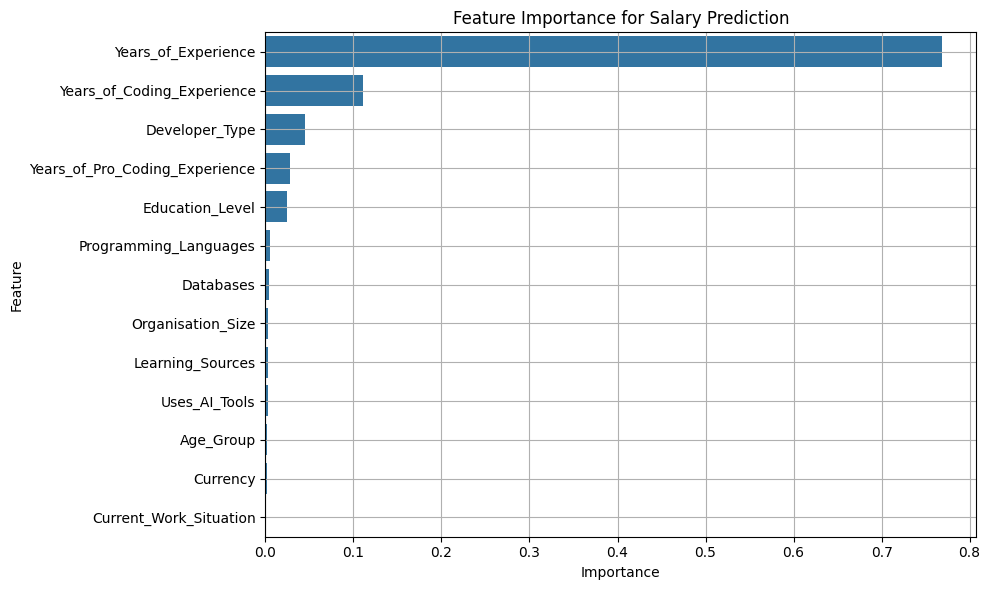

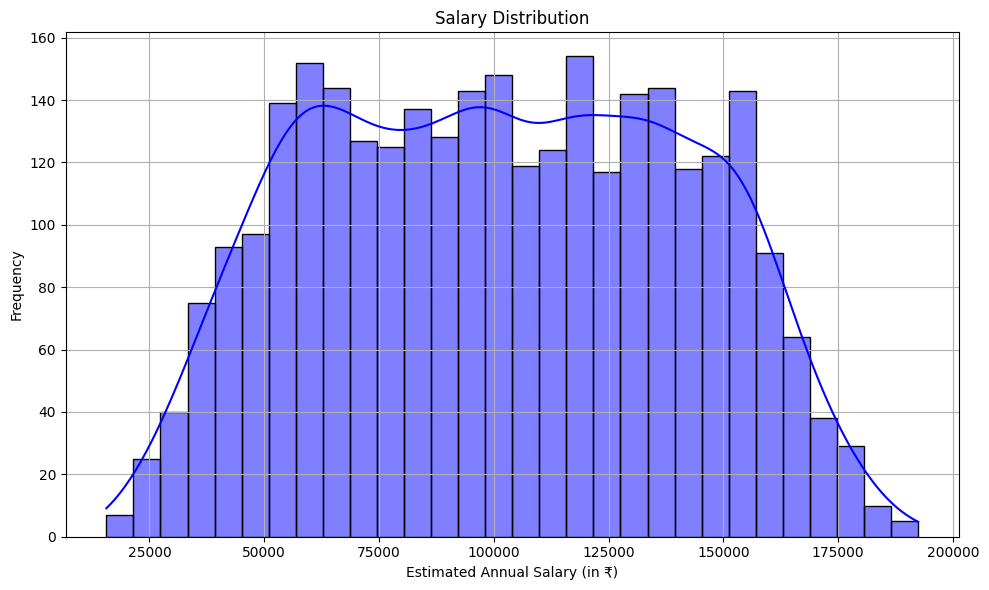

✅ Model and encoders saved to 'salary_model.pkl'


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

# 1. Load Dataset
csv_path = "salary"
df = pd.read_csv(csv_path)

# 2. Encode categorical columns
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column].astype(str))
        label_encoders[column] = le

# 3. Define features and target
X = df.drop(columns=['Estimated_Annual_Salary'])
y = df['Estimated_Annual_Salary']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 6. Evaluate model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"MAE: ₹{mae:.2f}")
print(f"RMSE: ₹{rmse:.2f}")
print(f"R²: {r2:.2f}")

# 7. Save model and encoders
with open("salary_model.pkl", "wb") as f:
    pickle.dump({
        "model": model,
        "label_encoders": label_encoders,
        "feature_columns": X.columns.tolist()
    }, f)

print("Model saved to 'salary_model.pkl'")

